# Assignment 6

### MACS 30150, Dr. Evans
### Zhou Xing

problem1 (a)

In [2]:
import pandas as pd

df1 = pd.read_csv('data/Auto.csv',na_values="?")
df1.dropna(inplace=True)
df1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


(b)

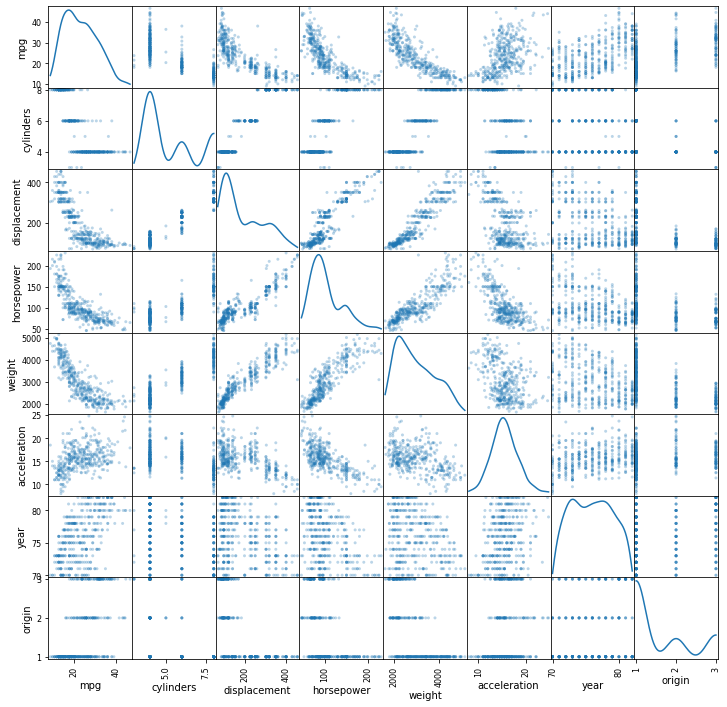

In [4]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
pd.plotting.scatter_matrix(df1, alpha=0.3, figsize=(12, 12),diagonal='kde')
plt.show()

(c)

In [5]:
df1.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


(d)

In [8]:
df1.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name', 'const'],
      dtype='object')

In [6]:
import statsmodels.api as sm
df1['const'] = 1
reg1 = sm.OLS(endog=df1['mpg'], exog=df1[['const', 'cylinders', \
                'displacement', 'horsepower', 'weight', 'acceleration' \
                ,'year', 'origin']], missing='drop')
results = reg1.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Tue, 18 Feb 2020   Prob (F-statistic):          2.04e-139
Time:                        17:35:03   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

(1) The coefficients of the variables displacement, weight, year and origin are significant at 1% level.  
(2) The coefficients of the variables cylinders, horsepower and acceleration are not statistically significant at the 10% level.  
(3) Holding the other varialbles constant, one year later of production of the vehicle is expected to increase 0.7508 miles per gallon on average.

(e)

(1) The variables displacement, horsepower and weight are most likely to have a nonlinear relationship with mpg.

In [9]:

df1['displacement_2'] = df1['displacement']**2
df1['horsepower_2'] = df1['horsepower']**2
df1['weight_2'] = df1['weight']**2
df1['acceleration_2'] = df1['acceleration']**2

reg2 = sm.OLS(endog=df1['mpg'], exog=df1[["const", "cylinders", "displacement", "displacement_2", "horsepower", \
                                            "horsepower_2", "weight", "weight_2", "acceleration", 
                                            "acceleration_2", "year", "origin"]], missing='drop')
results2 = reg2.fit()
print(results2.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     230.2
Date:                Tue, 18 Feb 2020   Prob (F-statistic):          1.75e-160
Time:                        17:36:02   Log-Likelihood:                -962.02
No. Observations:                 392   AIC:                             1948.
Df Residuals:                     380   BIC:                             1996.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             20.1084      6.696      3.

(2) The adjusted R-squared statistic is 0.866, which is better than 0.818 from part (d).  
(3) The coefficient of the displacement variable is no longer statistically significant at 1% level. Its coefficient and squared term coefficient are both not significant at even 10% level.  
(4) The p value of the coefficient of cylinders variable increases from 0.128 to 0.408. It is still not significant at the 10% level.

(f)

In [10]:
results2.predict(exog=[1, 6, 200, 200**2, 100, 100**2, 3100, 3100**2, 15.1, 15.1**2, 99, 1])[0]

38.73211109801073

The predicted miles per gallon is 38.73211109801073.

## problem2 (a)

In [ ]:
data = {"X1": [0, 2, 0, 0, -1, 1],
        "X2": [3, 0, 1, 1, 0, 1],
        "X3": [0, 0, 3, 2, 1, 1],
        "Y": ["Red", "Red", "Red", "Green", "Green", "Red"]}
df = pd.DataFrame(data)
df.index += 1
df["Dist"] = np.sqrt(df["X1"] ** 2 + df["X2"] ** 2 + df["X3"] ** 2)
df

In [12]:
import numpy as np
df2 = pd.DataFrame({"X1": [0, 2, 0, 0, -1, 1],
                    "X2": [3, 0, 1, 1, 0, 1],
                    "X3": [0, 0, 3, 2, 1, 1],
                    "Y": ["Red", "Red", "Red", "Green", "Green", "Red"]})
df2.index+=1
df2["Dist"] = np.sqrt(df2["X1"] ** 2 + df2["X2"] ** 2 + df2["X3"] ** 2)
df2

,X1,X2,X3,Y,Dist
1,0,3,0,Red,3.000000
2,2,0,0,Red,2.000000
3,0,1,3,Red,3.162278
4,0,1,2,Green,2.236068
5,-1,0,1,Green,1.414214
6,1,1,1,Red,1.732051


In [ ]:
df2['dist'] = (df2['X1'] ** 2 + df2['X2'] ** 2 + df2['X3'] ** 2) ** 0.5
df2

The euclidean distance for observations 1-6 is 3, 2, $\sqrt{10}$, $\sqrt{5}$, $\sqrt{2}$, $\sqrt{3}$  respectively.

(b)

When K=1, since the closest observation is number 5, the KNN prediction would be Green.

(c)

When K=3, since the three closest observations are number 5, 6 and 2 and both Y of 2 and 6 are red, the KNN prediction would be Red.

(d)

We would expect the best value for K to be large. This is because when K is large, the features of surrounding points in all directions could be captured better. Since the decision boundary boundary is highly non-linear, small K might neglect some important information and be problematic.

(e)

In [19]:
print("The median value of mpg is {}.\n".format(df1["mpg"].median()))

The median value of mpg is 22.75.



In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)
clf = knn.fit(df2[["X1", "X2", "X3"]], df2["Y"])
ans = clf.predict([(1, 1, 1)])[0]
print("The KNN classifier of the test point is '{}'.".format(ans))

The KNN classifier of the test point is 'Green'.


## problem3 (a)

In [17]:
tf = df1['mpg']>=df1['mpg'].median()
df1['mpg_high'] = np.where(tf,1,0)

reg3 = sm.Logit(endog=df1['mpg_high'], exog=df1[['const', 'cylinders', \
                'displacement', 'horsepower', 'weight', 'acceleration' \
                ,'year', 'origin']], missing='drop')
results3 = reg3.fit()
print(results3.summary())

Optimization terminated successfully.
         Current function value: 0.200944
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               mpg_high   No. Observations:                  392
Model:                          Logit   Df Residuals:                      384
Method:                           MLE   Df Model:                            7
Date:                Tue, 18 Feb 2020   Pseudo R-squ.:                  0.7101
Time:                        17:39:39   Log-Likelihood:                -78.770
converged:                       True   LL-Null:                       -271.71
                                        LLR p-value:                 2.531e-79
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.1549      5.764     -2.976      0.003     -28.452      -5.858
cylinders       -0.1626

The coefficients of the variables weight and year are significant at 5% level.

(b)

In [20]:
from sklearn.model_selection import train_test_split
Y = df1['mpg_high']
X = df1[["cylinders", "displacement", "horsepower", "weight", "acceleration", "year", "origin"]]
X_train, X_test, y_train, y_test = train_test_split(X, Y, \
                    test_size = 0.5, random_state=10)

(c)

In [23]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs', 
                        multi_class='multinomial', 
                        max_iter=200).fit(X_train, y_train)
results = {
    "Variables": ["const", "cylinders", "displacement", "horsepower", "weight", "acceleration", "year", "origin"],
    "Values": np.hstack((clf.intercept_, clf.coef_[0]))
}
pd.DataFrame(results)


,Variables,Values
0,const,-0.100269
1,cylinders,-0.657735
2,displacement,0.008577
3,horsepower,-0.017661
4,weight,-0.002572
5,acceleration,-0.109582
6,year,0.167356
7,origin,-0.046974


(d)

In [24]:
y_pred = clf.predict(X_test)
score = clf.score(X_test, y_test)
score

0.8724489795918368

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

Confusion matrix:
[[86 13]
 [12 85]]


In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.88      0.87      0.87        99
          1       0.87      0.88      0.87        97

avg / total       0.87      0.87      0.87       196

